# EDA: Phishing Detection Dataset

This notebook explores class balance and basic feature characteristics for a phishing detection dataset.

In [9]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

DATA_PATH = Path("../data/raw/malicious_phish.csv")
df = pd.read_csv(DATA_PATH)

# Update these if needed
TEXT_COL = "url"
LABEL_COL = "label"

In [10]:
df.head()

,url,label
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


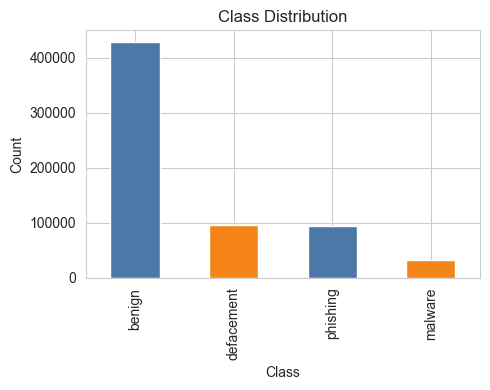

In [ ]:
# Class distribution plot
class_counts = df[LABEL_COL].value_counts()
ax = class_counts.plot(kind="bar", figsize=(5, 4), color=["#4c78a8", "#f58518"])
ax.set_title("Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
plt.tight_layout()

print(class_counts)

In [12]:
# Feature summaries
text_lengths = df[TEXT_COL].astype(str).str.len()
text_lengths.describe()

count    651191.000000
mean         60.156854
std          44.754050
min           1.000000
25%          32.000000
50%          47.000000
75%          77.000000
max        2175.000000
Name: url, dtype: float64

Insight: The class distribution shows whether phishing examples are underrepresented, which can affect model performance. If phishing samples are rare, precision and recall may diverge and a simple baseline could miss critical cases. The text length summary hints at whether phishing messages tend to be shorter (URLs) or longer (emails), which can influence the choice of features and n-gram ranges.